In [174]:
import pandas as pd
import numpy as np
import ast
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from collections import Counter


In [229]:

df = pd.concat(map(pd.read_csv, ["August_Twitter.csv","July_to_August_Twitter.csv", "May_to_July_Twitter.csv"]))

names = ['norm.author','meta.author_original','meta.tweet_type']
df2 = pandas.DataFrame(df[names])
df3 = df2.dropna()

retweet = list()
for item in df3.iloc:
    if item['meta.tweet_type'] != "Original":
        retweet.append({'source': item['norm.author'], "original_poster":item['meta.author_original']})    
new_list = sorted(retweet, key=lambda x:x["source"])


retweet_df = pandas.DataFrame(new_list)
retweet_sorted = pandas.DataFrame(np.sort(retweet_df.values, axis = 1), columns = retweet_df.columns)
retweet_sorted["value"] = 1
retweet_sorted = retweet_sorted.groupby(["source","original_poster"], sort=False, as_index=False).sum()
new = retweet_sorted.sort_values(by="value", ascending=False)
new_filtered = new[new['value'] > 1]


G = nx.from_pandas_edgelist(new_filtered, source = "source", target="original_poster", edge_attr="value", create_using=nx.Graph())

degree = nx.degree_centrality(G)

# PSYOP Twitter Experiment

## Team Communities
 - 11th Cyber Battalion
 - G39

## Percentage of Tweets

Most of the Tweets are retweets from another user. Meaning a user shared a posting from another user. The next highest is replies, where one user would mention another in a reply either from the original tweet or in the comments. Lastly, the original tweets are tweets that are initial tweets from a user.

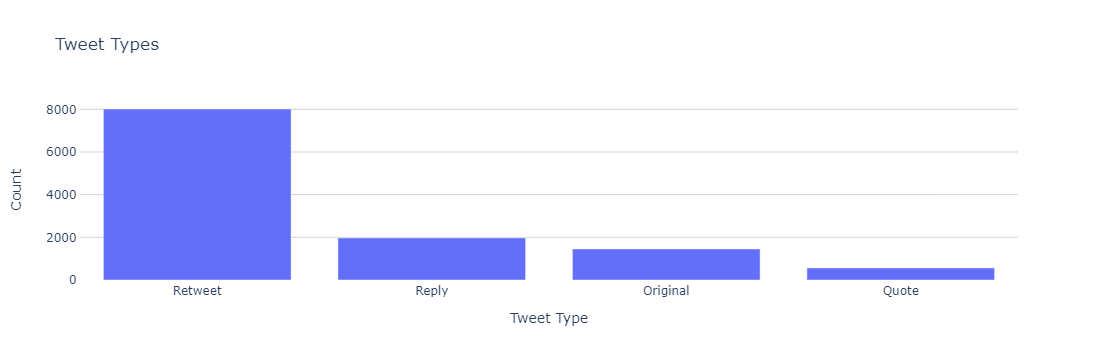

In [230]:
get_percentage_of_post(df)

## Centrality of Users
   - ### Top user
The individual with the most centraility is VTVcanel8. VTVcanal8 has iteracted with several users through either retweets or replies. He has the most interactions between the group of users. The can help deduce that this individual has some form of influence that has a greater effect from most other users.

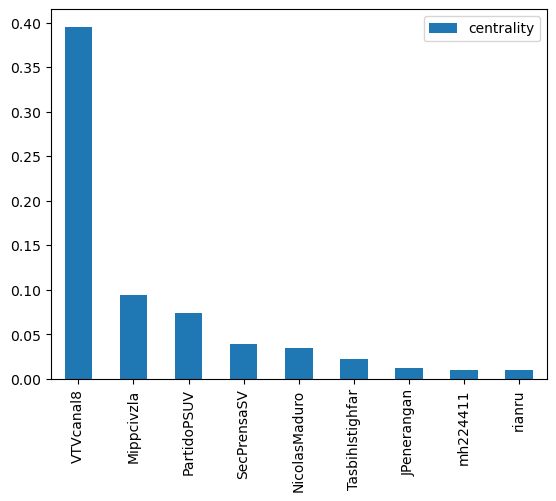

In [231]:
make_degrees(degree)

### Betweeness Centrality

  ####### TODO: ADD NOTES

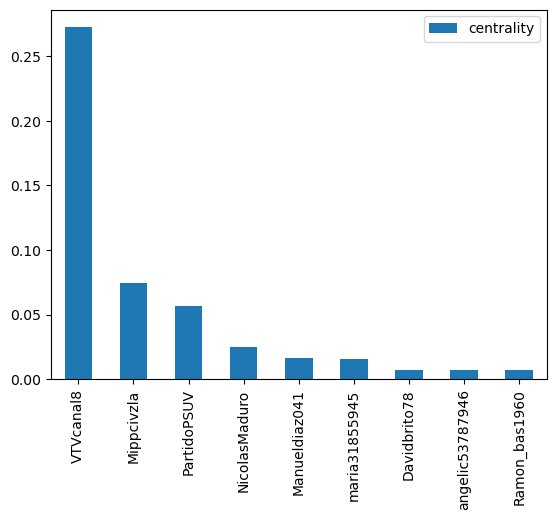

In [232]:
show_betweenness(G)

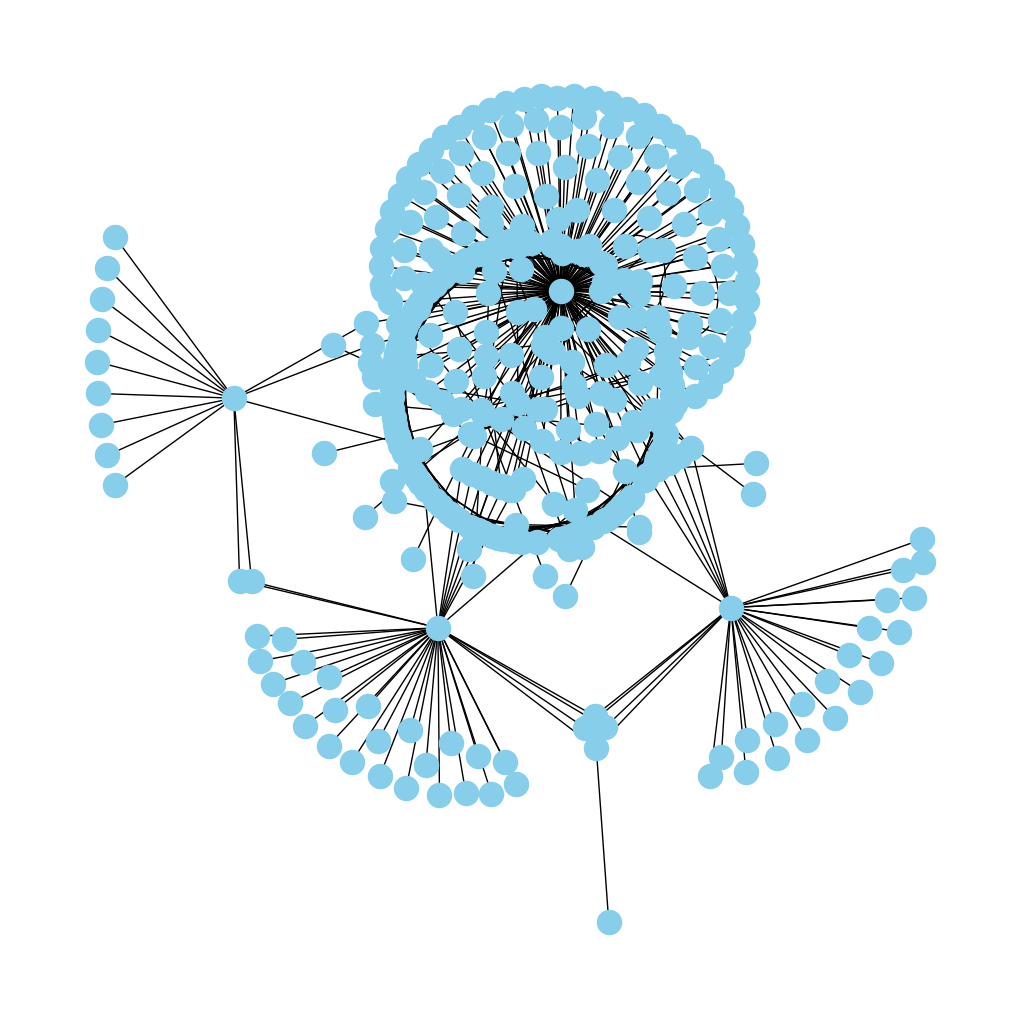

In [233]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = False, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)


In [234]:
def show_betweenness(G):
    betweenness_dict = nx.betweenness_centrality(G)
    betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
    # Plot top 10 nodes
    betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")


In [235]:
def get_percentage_of_post(df):
    
    df_count = {"Reply": 0, "Retweet" : 0, "Original" : 0, "Quote": 0}
    #group_df = df.groupby("meta.tweet_type")
   # df = pd.DataFrame(group_df)
    #df.to_csv("csv.csv")
    for name in df.iloc:
        df_count[name['meta.tweet_type']] +=1
        
    new_df = pd.DataFrame.from_dict(df_count, orient='index', columns=['Count'])
    new_df = new_df.sort_values(by='Count', ascending=False)
    fig = go.Figure(data=[go.Bar(x=new_df.index, y=new_df['Count'])])
    
    fig.update_layout(
    title="Tweet Types",
    xaxis_title="Tweet Type",
    yaxis_title="Count",
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True, gridcolor='lightgray'),
    plot_bgcolor='white',
    )
 
    fig.show()
    

In [236]:
def make_degrees(degree):
    degree_df = pd.DataFrame.from_dict(degree, orient='index', columns=['centrality'])
    # Plot top 10 nodes
    degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")
